* 학습의 목표
* 머신러닝의 분류모델을 이용하여, 여러가지 평가지표를 적용하여 확인
* 의학(당뇨병 여부 판단) : 재현율 지표를 확인

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate, KFold


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import missingno as ms

%matplotlib inline



import warnings
warnings.filterwarnings('ignore')

In [5]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# target 분포 확인
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# 분류를 위한 예측모델 생성
# 모델 셀렉션, 교차검증
# 학습, 예측 및 평가

In [ ]:
# 임계값별 정밀도-재현율을 확인 및 시각화
# 당수치, 혈압, 피하지방, 인슐린, BMI의 분포를 히스토그램으로 확인
# 표준화, 정규화

In [9]:
diabetes_df.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
dia_df = diabetes_df.iloc[:, :-1]
dia_target = diabetes_df.iloc[:, -1]

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(dia_df,
                                                    dia_target, 
                                                    test_size = 0.3, 
                                                    random_state = 200)


In [15]:
# 분류 학습기 생성
ran_forest = RandomForestClassifier()

In [24]:
# 학습 및 평가(교차검증)
fol = KFold(n_splits = 10,
            random_state = 200, 
            shuffle = True)

scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1-score' : make_scorer(f1_score)
}

result = cross_validate(ran_forest,
                       dia_df,
                       dia_target,
                       cv = fol,
                       scoring = scoring)

print(result.keys())

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1-score'])


In [25]:
# 평가지표에 대한 평균값을 구해보자 
print('accuracy' ,  np.round( result['test_accuracy'].mean(), 2) )
print('precision' , np.round( result['test_precision'].mean(), 2) )
print('recall' ,    np.round( result['test_recall'].mean(), 2) )
print('f1_score' ,    np.round( result['test_f1-score'].mean(), 2) )

accuracy 0.76
precision 0.7
recall 0.58
f1_score 0.63


In [26]:
def display_eval(y_test, y_pred) :
    confusion = confusion_matrix(y_test, y_pred)   # 분류결과표
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print()
    print(confusion)
    print("*" *50)
    print()
    print('정확도 : {}, 정밀도 : {}, 재현율: {}'.format(accuracy, precision, recall))

In [27]:
# 로지스틱 회귀
Ir_model = LogisticRegression()
Ir_model.fit(X_train, y_train)
prediction = Ir_model.predict(X_test)
display_eval(y_test, prediction)


[[145  14]
 [ 29  43]]
**************************************************

정확도 : 0.8138528138528138, 정밀도 : 0.7543859649122807, 재현율: 0.5972222222222222


In [28]:
pred_pro_result = Ir_model.predict_proba(X_test)
print('shape', pred_pro_result.shape)
print('result\n', pred_pro_result[:3]) #0.5를 기준
print()
print("*" * 50)
print()
y_pred = Ir_model.predict(X_test)
print(y_pred)

result = np.concatenate([pred_pro_result, y_pred.reshape(-1,1)], axis = 1)
print('확률에 따른 예측 결과\n' , result[:5])

shape (231, 2)
result
 [[0.24482295 0.75517705]
 [0.70735901 0.29264099]
 [0.86759188 0.13240812]]

**************************************************

[1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0]
확률에 따른 예측 결과
 [[0.24482295 0.75517705 1.        ]
 [0.70735901 0.29264099 0.        ]
 [0.86759188 0.13240812 0.        ]
 [0.55596153 0.44403847 0.        ]
 [0.44484662 0.55515338 1.        ]]


In [32]:
user_threshold = 0.4
# pred_pro_result[:, 1]
positive_pred_proba = pred_pro_result[: , 1].reshape(-1,1)
# positive_pred_proba

user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
display_eval(y_test, user_predict)


[[130  29]
 [ 19  53]]
**************************************************

정확도 : 0.7922077922077922, 정밀도 : 0.6463414634146342, 재현율: 0.7361111111111112


In [35]:
# 레이블 값이 1일 때의 예측확률을 추출
pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]
# print(pred_positive_label)
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)
# print('precisions\n', precisions)
# print('recalls\n', recalls)
print('thresholds\n',thresholds.shape[0])

thresholds
 228


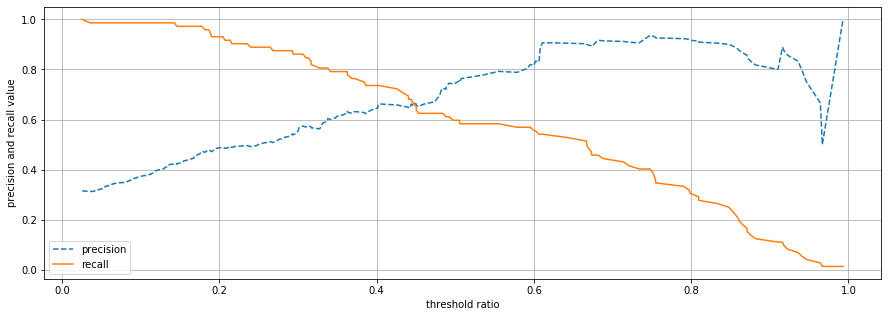

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

plt.plot(thresholds, precisions[0 : thresholds.shape[0]], linestyle='--', label='precision')
plt.plot(thresholds, recalls[0 : thresholds.shape[0]], label = 'recall')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show()

In [37]:
# 레이블 값이 1일 때의 예측확률을 추출
pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]

fprs, tprs, thresholds = roc_curve(y_test , pred_positive_label)
print(fprs.shape[0])
print(tprs.shape[0])
print(thresholds.shape[0])

print('샘플추출')
print()
thr_idx = np.arange(1, thresholds.shape[0] , 6)
print('thr idx : ', thr_idx)
print(thresholds[thr_idx])
print('threshold value : ', thresholds[thr_idx])
print()
print('fprs value : ', fprs[thr_idx])
print()
print('tprs value : ', tprs[thr_idx])

57
57
57
샘플추출

thr idx :  [ 1  7 13 19 25 31 37 43 49 55]
[0.99320349 0.68174007 0.59536812 0.49233847 0.44403847 0.36251204
 0.30638782 0.23531991 0.18664499 0.02539277]
threshold value :  [0.99320349 0.68174007 0.59536812 0.49233847 0.44403847 0.36251204
 0.30638782 0.23531991 0.18664499 0.02539277]

fprs value :  [0.         0.01886792 0.05660377 0.09433962 0.1572327  0.20754717
 0.28930818 0.41509434 0.47169811 0.98113208]

tprs value :  [0.01388889 0.45833333 0.56944444 0.61111111 0.68055556 0.79166667
 0.86111111 0.90277778 0.95833333 1.        ]


<function matplotlib.pyplot.show(*args, **kw)>

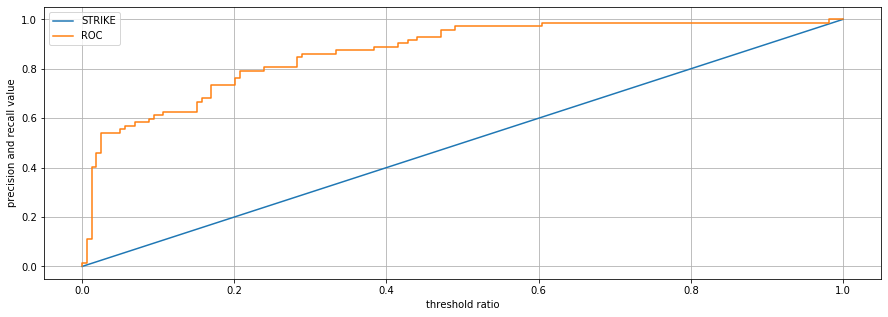

In [38]:
pred_positive_label = Ir_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_positive_label)

plt.figure(figsize=(15,5))

# 대각선
plt.plot([0,1] , [0,1] , label = 'STRIKE')

# ROC
plt.plot(fprs, tprs, label = 'ROC')

plt.xlabel('threshold ratio')
plt.ylabel('precision and recall value')
plt.legend()
plt.grid()
plt.show

In [39]:
# 로지스틱 회귀
Ir_model = LogisticRegression()
Ir_model.fit(X_train, y_train)
prediction = Ir_model.predict(X_test)
print('roc auc value {}'.format(roc_auc_score(y_test , prediction)))

roc auc value 0.7545859538784068


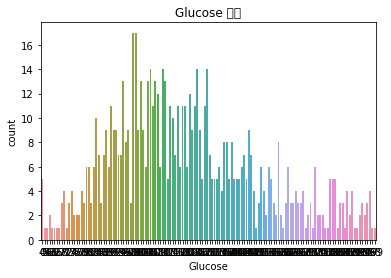

In [40]:
sns.countplot(dia_df.Glucose)
plt.title('Glucose 분포')
plt.show()

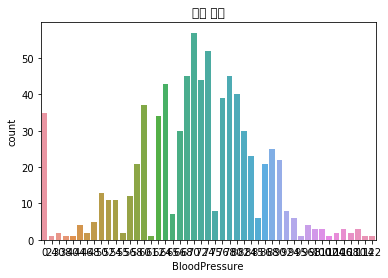

In [41]:
sns.countplot(dia_df.BloodPressure)
plt.title('혈압 분포')
plt.show()

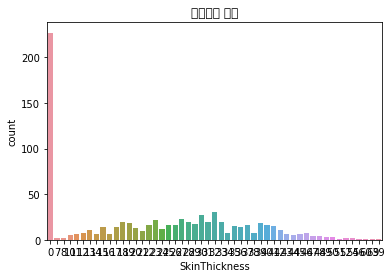

In [42]:
sns.countplot(dia_df.SkinThickness)
plt.title('피하지방 분포')
plt.show()

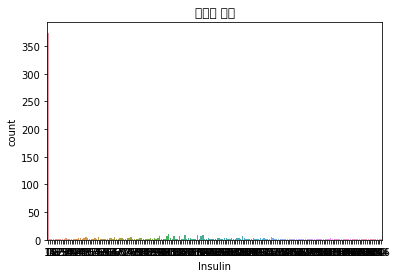

In [43]:
sns.countplot(dia_df.Insulin)
plt.title('인슐린 분포')
plt.show()

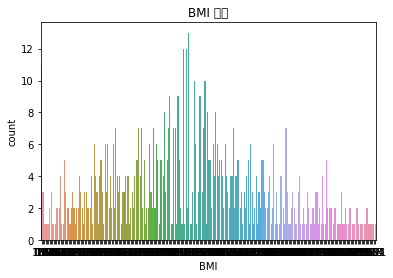

In [44]:
sns.countplot(dia_df.BMI)
plt.title('BMI 분포')
plt.show()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64